In [1]:
# !pip install kaggle
# from google.colab import files
# files.upload()

In [2]:
# ! ls -1ha kaggle.json

In [3]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# # Permission Warning이 발생하지 않도록 해줍니다.
# !chmod 600 ~/.kaggle/kaggle.json
# # 내가 참가한 대회 리스트 확인
# !kaggle competitions list

In [4]:
# !kaggle competitions download -c h-and-m-personalized-fashion-recommendations

In [5]:
# !ls

In [6]:
# !unzip h-and-m-personalized-fashion-recommendations.zip 

# Explotatory Data Analysis. H&M

## Table of Content

> 1. First steps
> 2. Articles
> 3. Customers
> 4. Transactions
> 5. Images with description and price 

### Intro

The competition is dedicated to the product recomendations (H&M)

Here we have different kinds of data that help us to get good recomendations:

> - images - images of every article_id
> - articles - detailed metadata of every article_id
> - customers - detailed metadata of every customer_id
> - transactions_train - purchases with details


## 1.First steps

Go to Table of Content

The first step as always: load the data

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

In [8]:
articles = pd.read_csv('/content/articles.csv')
customers = pd.read_csv('/content/customers.csv')
transactions = pd.read_csv('/content/transactions_train.csv')

Let's look at the tables and try to get some outcomes about data inside.

## 2.Articles

This table contains all h&m articles with details such as a type of product, a color, a product group and other features. 

Article data description:

> - `article_id:` A unique identifier of every article.
> - `product_code`, `prod_name`: A unique identifier of every product and its name(not the same.)
> - `product_type`, `product_type_name`: The group of product_code and its name.
> - `graphical_appearance_no`, `graphical_appearance_name`: The group of graphics and its name.
> - `colour_group_code`, `colour_group_name`: The group of color and its name.
> - `perceived_colour_value_id`, `perceived_colour_value_name`, `perceived_colour_master_id`, `perceived_colour_master_name`: A unique identifier of every dep and its name.
> - `index_code`, `index_name`: A unique identifier of every index and its name.
> - `index_group_no`, `index_group_name`: A group of indeces and its name.
> - `section_no`, `section_name`: A unique identifier of every section and its name.
> - `garment_group_no`, `garment_group_name`: A unique identifier of every garment and its name.
> - `detail_desc`: Details

In [9]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


Ladieswear accounts for a significant part of all dresses. Sportswear has the least portion.

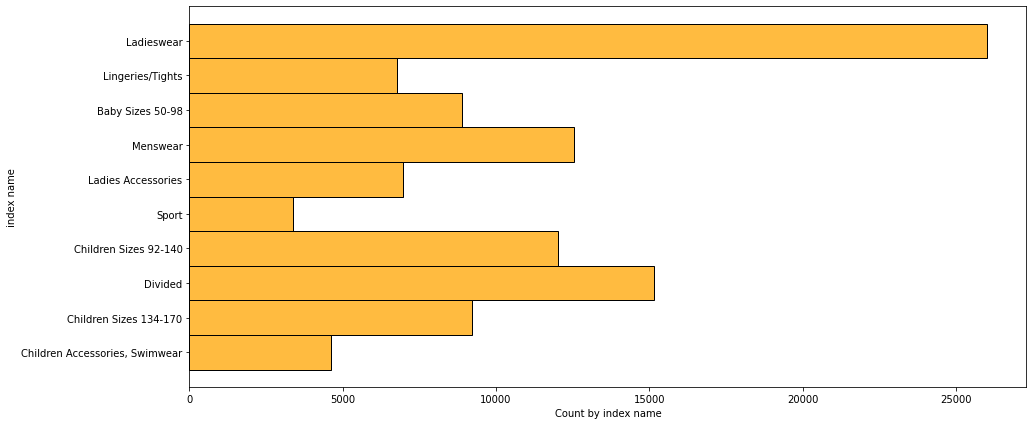

In [10]:
f, ax = plt.subplots(figsize=(15,7))
sns.histplot(data=articles, y='index_name', color='orange')
ax.set_xlabel('Count by index name')
ax.set_ylabel('index name')
plt.show()

> - index_name(여성복, 남성복, 운동복...)으로 구분지었을때의 전체 판매량.
> - 여성복이 가장 많다. 운동복이 가장 작다.

The garments grouped by index: 'Jersey fancy'is the most frequent garment, especially for women and children. The next by number is accessories, many various accessories with low price.

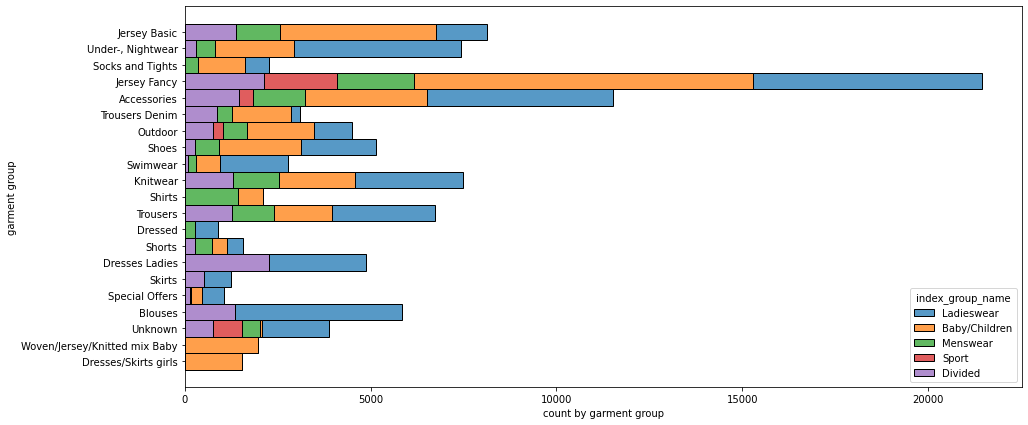

In [11]:
f, ax = plt.subplots(figsize=(15,7))
sns.histplot(data=articles, y='garment_group_name', color='orange', hue='index_group_name', multiple='stack')
ax.set_xlabel('count by garment group')
ax.set_ylabel('garment group')
plt.show()

> - garment_group_name(져지, 속옷, 셔츠...)등의 기준으로 보앗을때, 'Jersey Fancy'의 빈도수가 가장 높다. 그 안에서도 여성, 아동복의 비율이 가장 크다. 그 다음이 'accessories'이다. - 아마 저렴한 가격 때문에 그런듯하다.

Now, pay attention to index group-index structure. Ladieswear and Children/Baby have subgroups.

In [12]:
articles.groupby(['index_group_name', 'index_name'])['article_id'].count()

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
Name: article_id, dtype: int64

And look at the product group-product structure. Accessories are really various, the most numerious: bags, earings and hats. However, trousers prevail.

In [13]:
articles.groupby(['product_group_name'])['product_type_name'].nunique()

product_group_name
Accessories              38
Bags                      6
Cosmetic                  2
Fun                       1
Furniture                 1
Garment Full body         6
Garment Lower body        5
Garment Upper body       15
Garment and Shoe care     6
Interior textile          3
Items                     5
Nightwear                 4
Shoes                    16
Socks & Tights            3
Stationery                1
Swimwear                  6
Underwear                11
Underwear/nightwear       2
Unknown                   1
Name: product_type_name, dtype: int64

In [14]:
articles.groupby(['product_group_name', 'product_type_name']).count()['article_id']

product_group_name   product_type_name
Accessories          Accessories set         7
                     Alice band              6
                     Baby Bib                3
                     Bag                  1280
                     Beanie                 56
                                          ... 
Underwear            Underwear corset        7
                     Underwear set          47
Underwear/nightwear  Sleep Bag               6
                     Sleeping sack          48
Unknown              Unknown               121
Name: article_id, Length: 132, dtype: int64

And the table with number of unique values in columns:

In [15]:
for col_nm in articles.columns:
    if articles[col_nm].dtype != 'int64':
        print(f'number of unique {col_nm}: ', articles[col_nm].nunique())

number of unique prod_name:  45875
number of unique product_type_name:  131
number of unique product_group_name:  19
number of unique graphical_appearance_name:  30
number of unique colour_group_name:  50
number of unique perceived_colour_value_name:  8
number of unique perceived_colour_master_name:  20
number of unique department_name:  250
number of unique index_code:  10
number of unique index_name:  10
number of unique index_group_name:  5
number of unique section_name:  56
number of unique garment_group_name:  21
number of unique detail_desc:  43404


## 3. Customers

Go to Table of Content

> - `customer_id`: A unique identifier of every customer
> - `FN`: 1 or missed
> - `Active`: 1 or missed
> - `club_member_status`: Status in club
> - `fashion_news_frequency`: How often H&M may send news to customer
> - `age`: The current age
> - `postal_code`: Postal code of customer

In [16]:
pd.options.display.max_rows = 50
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


There are no duplicates in `customers`

고객정보에 중복값이 없음.(모두 다른 고객정보)

In [17]:
customers.shape[0] - customers['customer_id'].nunique()

0

Here we have abnormal number of customers by one postal code. One has 120303, it might be encoded nan adress or smth like a huge distribution center, or pickup.

In [18]:
data_postal = customers.groupby(['postal_code'], as_index=False).count().sort_values('customer_id', ascending=False)
data_postal.head()

,postal_code,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
61034,2c29ae653a9282cce4151bd87643c907644e09541abc28...,120303,42874,39886,118281,114377,118002
281937,cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac...,261,109,104,261,261,260
156090,714976379549eb90aae4a71bca6c7402cc646ae7c40f6c...,159,90,88,159,159,158
171208,7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5...,157,55,54,157,156,156
126228,5b7eb31eabebd3277de632b82267286d847fd5d44287ee...,156,42,41,156,156,155


Ages, club_member_status are different, like customer_ids.

In [19]:
customers[customers['postal_code'] == '2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c'].head(5)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
5,000064249685c11552da43ef22a5030f35a147f723d5b0...,NaN,NaN,NaN,NaN,NaN,2c29ae653a9282cce4151bd87643c907644e09541abc28...
8,00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef77...,NaN,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
9,00008469a21b50b3d147c97135e25b4201a8c58997f787...,NaN,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
11,000097d91384a0c14893c09ed047a963c4fc6a5c021044...,NaN,NaN,ACTIVE,NONE,31.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
14,0000ae1bbb25e04bdc7e35f718e852adfb3fbb72ef38b3...,1.0,1.0,ACTIVE,Regularly,29.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...


The most common age is about 21-23


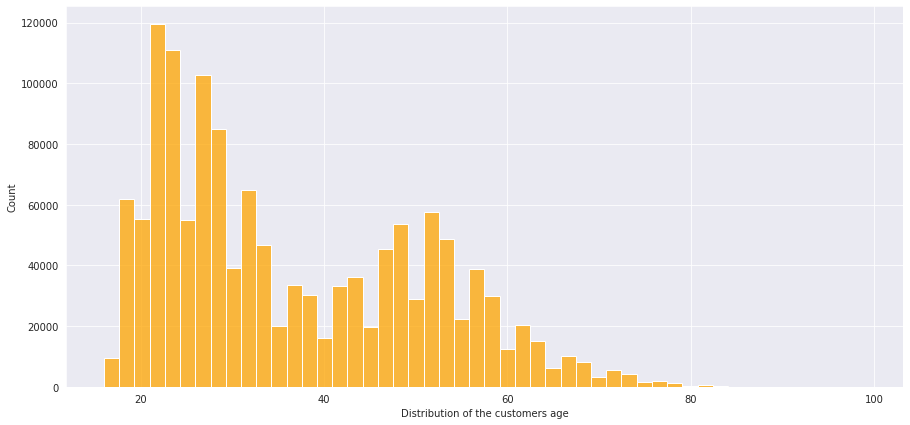

In [20]:
sns.set_style('darkgrid')

f, ax = plt.subplots(1, figsize=(15, 7))
sns.histplot(x='age', data=customers, bins=50, color='orange')
ax.set_xlabel('Distribution of the customers age')

plt.show()

Status in H&M club. Almost every customer has an active club status, some of them begin to activate if (pre-ceate). A tiny part of customers abandoned the club.

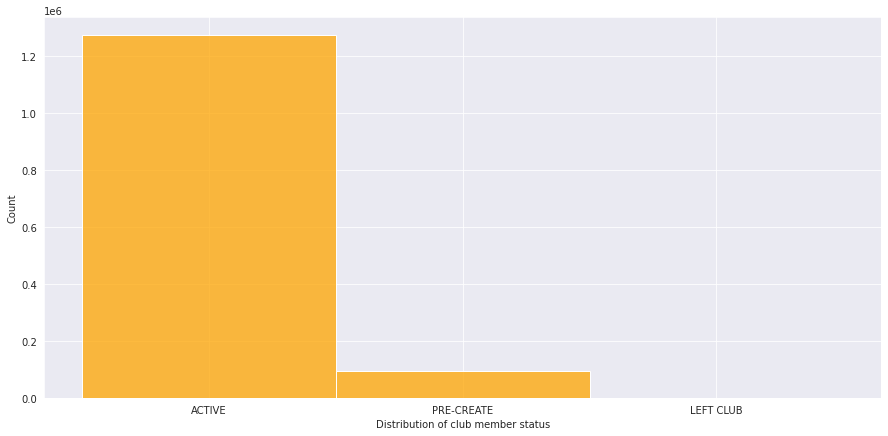

In [21]:
sns.set_style('darkgrid')
f,ax = plt.subplots(figsize=(15,7))
sns.histplot(x='club_member_status', data=customers, color='orange')
ax.set_xlabel('Distribution of club member status')
plt.show()

Here we have three types for 'NO DATA'. Let's unite these values.

In [22]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [23]:
customers['fashion_news_frequency'].unique()

array(['NONE', 'Regularly', nan, 'Monthly', 'None'], dtype=object)

In [24]:
customers.loc[~customers['fashion_news_frequency'].isin(['Regularly', 'Monthly']), 'fashion_news_frequency'] = 'None'
customers['fashion_news_frequency'].unique()

array(['None', 'Regularly', 'Monthly'], dtype=object)

In [25]:
pie_data = customers[['fashion_news_frequency', 'customer_id']].groupby('fashion_news_frequency').count()

Customers prefer not to get any messages about the current news.

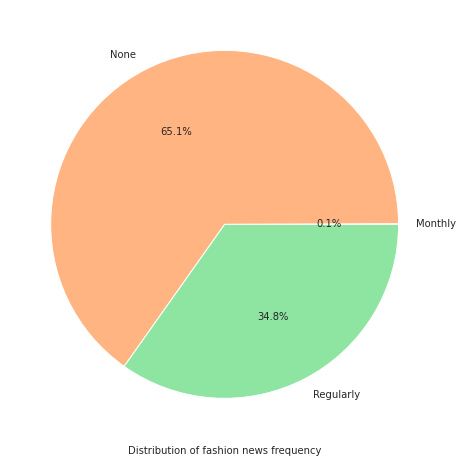

In [26]:
f,ax = plt.subplots(figsize=(12,8))

# ax = sns.pie(data=customers, x='fashion_news_frequency')
colors = sns.color_palette('pastel')
ax.pie(pie_data.customer_id, labels=pie_data.index, colors=colors, autopct='%1.1f%%')

ax.set_facecolor('lightgrey')
ax.set_xlabel('Distribution of fashion news frequency')
plt.show()

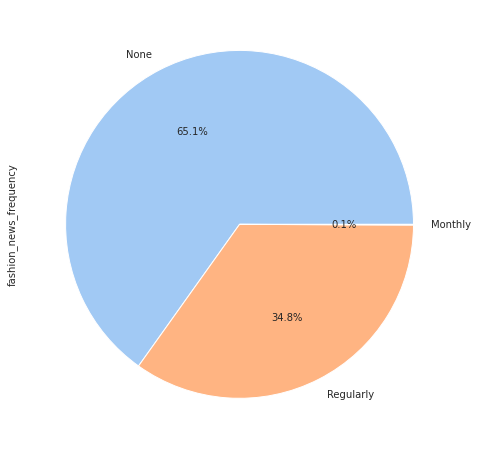

In [27]:
f, ax = plt.subplots(figsize=(8, 8))
customers['fashion_news_frequency'].value_counts().plot.pie(ax=ax, autopct='%1.1f%%', colors=colors)

plt.show()

## 4.Transactions

Go to Table of Content

Transactions data description:
> - `t_date`: transaction date.
> - `customer_id`: A unique identifier of every customer(in `customers` table)
> - `article_id`: A unique identifier of every article(in `articles` table)
> - `price`: Price of purchase
> - `sales_channel_id`: 1 or 2

In [28]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


Here we see outliers for price

In [29]:
pd.set_option('display.float_format', '{:.4f}'.format) # price의 dtype이 float이므로 보기좋게 소수점 4자리 까지 보여줘라.
transactions.describe()['price']

count   31788324.0000
mean           0.0278
std            0.0192
min            0.0000
25%            0.0158
50%            0.0254
75%            0.0339
max            0.5915
Name: price, dtype: float64

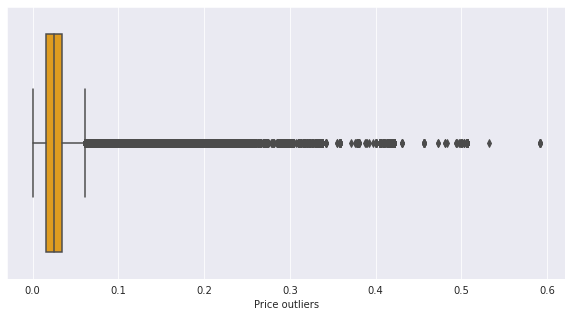

In [30]:
sns.set_style('darkgrid')

f,ax = plt.subplots(figsize=(10, 5))

ax = sns.boxplot(data=transactions, x='price', color='orange')

ax.set_xlabel('Price outliers')

plt.show()

In [31]:
transactions_byid = transactions.groupby('customer_id').count()

In [32]:
transactions_byid.sort_values('price', ascending=False)['price'][:10]

customer_id
be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b    1895
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71    1441
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f    1364
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc    1361
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6    1237
55d15396193dfd45836af3a6269a079efea339e875eff42cc0c228b002548a9d    1208
c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27cf9bda5517c8774f8fa    1170
8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d659fa4e5c3af6cc076    1169
03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296    1157
6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2e57161f0ef810a4b55    1143
Name: price, dtype: int64

However, comparing prices inside groups is more accurate, because accessories and trousers prices may vary largerly.

In [33]:
articles_for_merge = articles[['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'index_name']]
articles_for_merge.head()

,article_id,prod_name,product_type_name,product_group_name,index_name
0,108775015,Strap top,Vest top,Garment Upper body,Ladieswear
1,108775044,Strap top,Vest top,Garment Upper body,Ladieswear
2,108775051,Strap top (1),Vest top,Garment Upper body,Ladieswear
3,110065001,OP T-shirt (Idro),Bra,Underwear,Lingeries/Tights
4,110065002,OP T-shirt (Idro),Bra,Underwear,Lingeries/Tights


In [34]:
articles_for_merge = transactions[['customer_id','article_id','price','t_dat']].merge(articles_for_merge, on='article_id', how='left')

articles_for_merge.head()

,customer_id,article_id,price,t_dat,prod_name,product_type_name,product_group_name,index_name
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.0508,2018-09-20,Atlanta Push Body Harlow,Underwear body,Underwear,Lingeries/Tights
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.0305,2018-09-20,Rae Push (Melbourne) 2p,Bra,Underwear,Lingeries/Tights
2,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.0152,2018-09-20,Inca Jumper,Sweater,Garment Upper body,Divided
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.0169,2018-09-20,W YODA KNIT OL OFFER,Sweater,Garment Upper body,Ladieswear
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.0169,2018-09-20,W YODA KNIT OL OFFER,Sweater,Garment Upper body,Ladieswear


Here we see outliers for group name prices. Lower/Upper/Full body have a huge price variance. I guess it could be like some unique collections, relative to casual ones. Some high price articles even belong to accessories group.

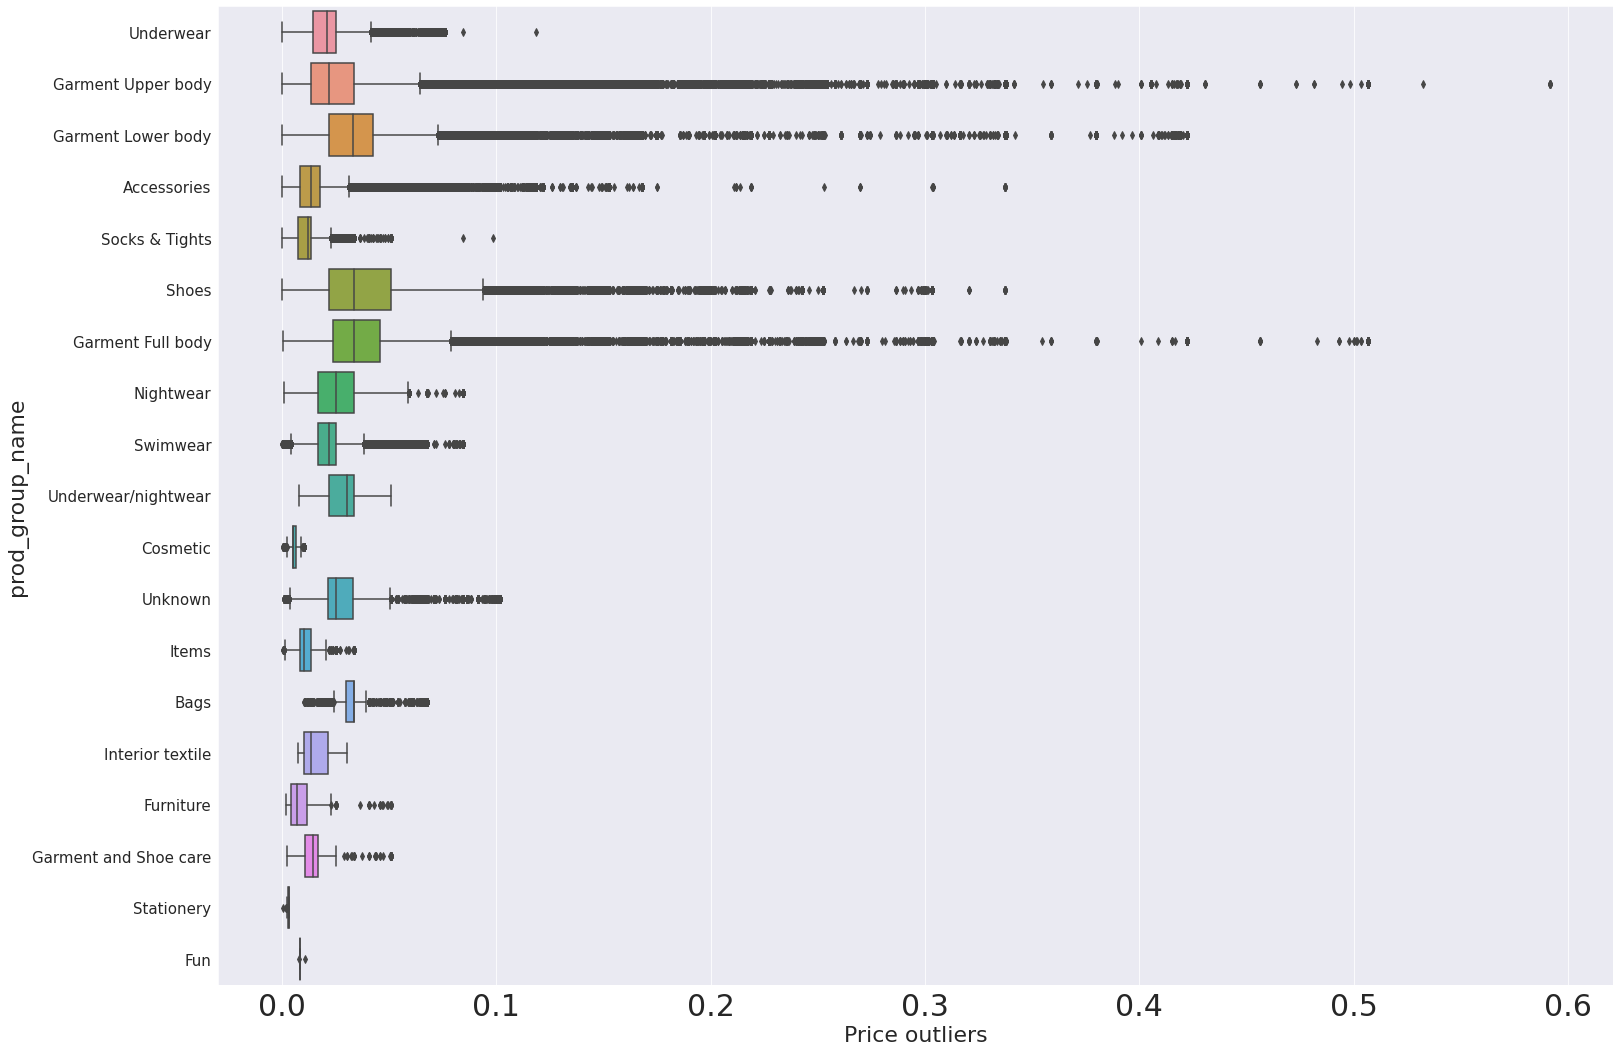

In [35]:
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(25, 18))

ax = sns.boxplot(data=articles_for_merge, x='price', y='product_group_name')

ax.set_xlabel('Price outliers', fontsize=22)
ax.set_ylabel('prod_group_name', fontsize=22)
ax.xaxis.set_tick_params(labelsize=30)
ax.yaxis.set_tick_params(labelsize=15)

plt.show()

Then look at boxplot prices according to accessories product group and find the reasons of high prices inside group.

The largest outliers can be found among bags, which is logical enough. In addition, scarves and other accessories have articles with prices highly contrasting to the rest of garments.